In [94]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings
import os
import jdatetime
warnings.filterwarnings('ignore')

In [95]:
file_path = 'E:\\report.xlsx'
df = pd.read_excel(file_path,skiprows=1,sheet_name='کل ایستگاه ها')
rows_to_delete = [0, 1463]
df = df.drop(rows_to_delete, axis=0)
df = df.rename(columns={'تاریخ': 'Date'})
# Function to convert Jalali date to Gregorian date
def convert_jalali_to_gregorian(jalali_date):
    year, month, day = map(int, jalali_date.split('/'))
    g_date = jdatetime.date(year, month, day).togregorian()
    return g_date
# Apply the conversion to the 'Date' column in the DataFrame
df['Date'] = df['Date'].apply(convert_jalali_to_gregorian)
# Convert the Gregorian dates to pandas datetime format
df['Date'] = pd.to_datetime(df['Date'])
df

,ایستگاه,Date,CO,O3,NO2,SO2,PM10,PM2.5,AQI,پاک,قابل قبول,ناسالم برای گروه حساس,ناسالم,بسیار ناسالم,خطرناک
1,کل ایستگاه ها,2020-09-01,20.0,68.0,71.0,70.0,54.0,76.0,76.0,NaN,1.0,NaN,NaN,NaN,NaN
2,کل ایستگاه ها,2020-09-02,27.0,60.0,85.0,76.0,55.0,81.0,85.0,NaN,1.0,NaN,NaN,NaN,NaN
3,کل ایستگاه ها,2020-09-03,33.0,65.0,87.0,30.0,58.0,85.0,87.0,NaN,1.0,NaN,NaN,NaN,NaN
4,کل ایستگاه ها,2020-09-04,31.0,69.0,83.0,28.0,51.0,75.0,83.0,NaN,1.0,NaN,NaN,NaN,NaN
5,کل ایستگاه ها,2020-09-05,29.0,45.0,73.0,22.0,45.0,63.0,73.0,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,کل ایستگاه ها,2024-08-28,42.0,63.0,76.0,17.0,81.0,106.0,106.0,NaN,NaN,1.0,NaN,NaN,NaN
1459,کل ایستگاه ها,2024-08-29,39.0,88.0,79.0,16.0,72.0,98.0,98.0,NaN,1.0,NaN,NaN,NaN,NaN
1460,کل ایستگاه ها,2024-08-30,27.0,85.0,52.0,16.0,58.0,77.0,85.0,NaN,1.0,NaN,NaN,NaN,NaN
1461,کل ایستگاه ها,2024-08-31,32.0,77.0,56.0,15.0,57.0,78.0,78.0,NaN,1.0,NaN,NaN,NaN,NaN


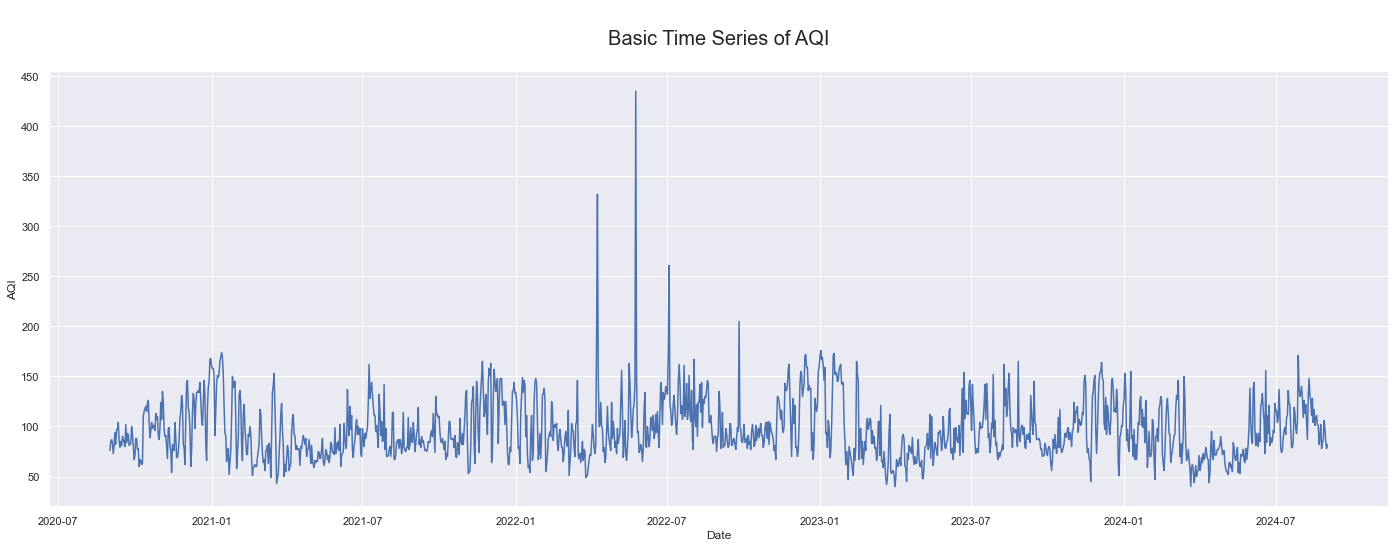

In [34]:
sns.set(rc={'figure.figsize':(24, 8)})
ax = sns.lineplot(data=df, x='Date', y='AQI')
ax.set_title("\nBasic Time Series of AQI\n", fontsize=20)
# Step 4: Show the plot
plt.show()

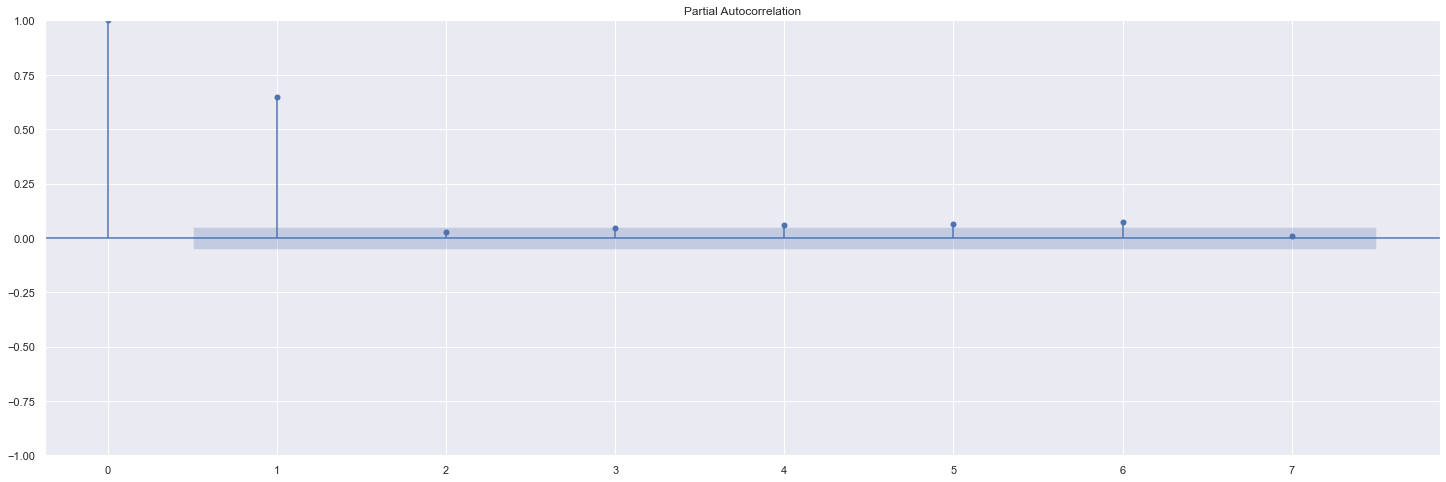

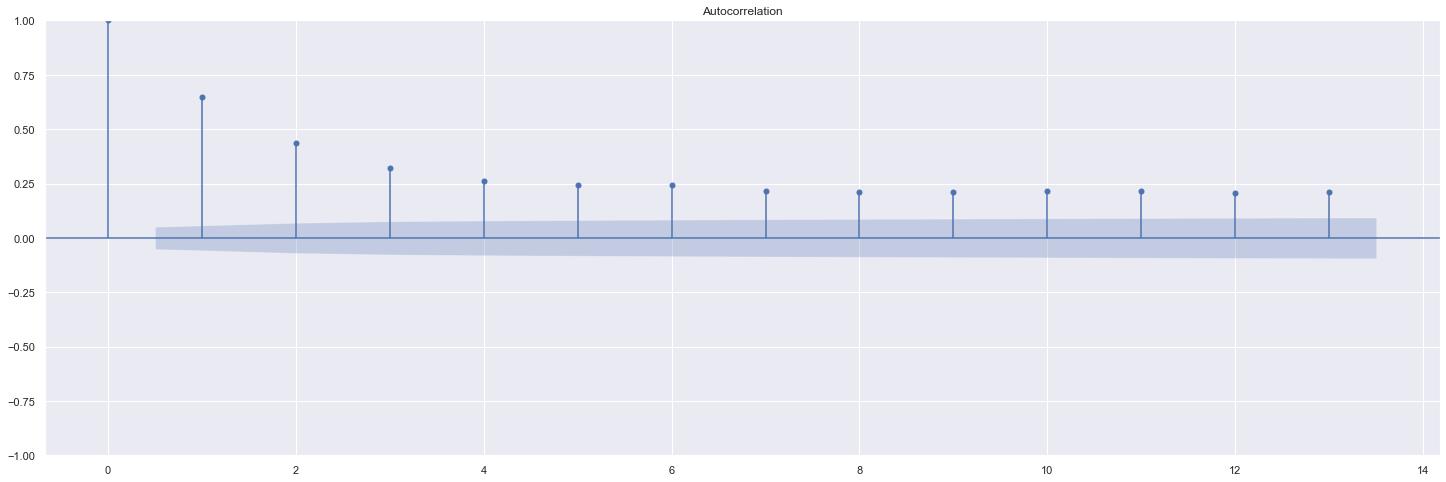

In [35]:
import pickle
from scalecast.Forecaster import Forecaster
from statsmodels.graphics.tsaplots import plot_acf  
sns.set(rc={'figure.figsize':(25,8)})
f = Forecaster(y=df.AQI, current_dates=df.Date)
f.plot_pacf(lags=7)
plt.show()
plot_acf(df['AQI'], lags=13)
plt.show()

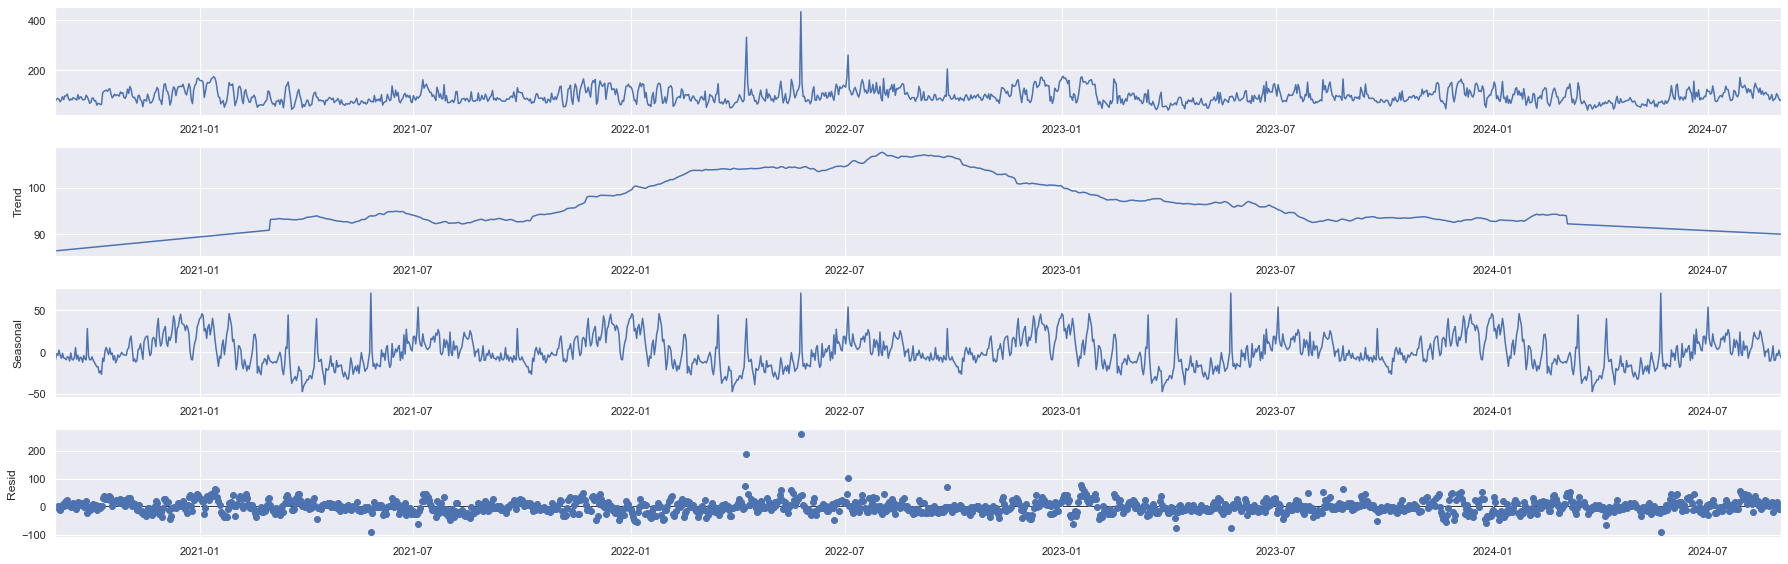

In [36]:
f.seasonal_decompose (model='additive', extrapolate_trend='freq', period=364).plot()
plt.show()

کد زیر برای انجام آزمون دیکی-فولر استفاده میشود
(Augmented Dickey-Fuller Test یا ADF Test)
هدف آن برسی ایستایی سری زمانی است.
دو مقدار آماره ی آزمون و پی ولیو را به عنوان خروجی میدهد

In [37]:
stat, p, _, _, _, _ = f.adf_test(full_res=True)
print(stat, p)

-5.260613527165533 6.603777238075072e-06


مقدار آماره منفی شده که بسیار کم است.
مقداری پی ولیو هم بسیار کم شده. نشان دهنده این است که سری زمانی احتمالا پایاست 

برای اطمینان بیشتر کدی رو مینویسیم که هر سری آزمون را انجام دهد و اگر نیاز بود تفاضل گیری را انجام دهد.

In [38]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

adf_result = adfuller(df['AQI'])
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

if adf_result[1] > 0.05:
    df_diff = df['AQI'].diff().dropna()
    adf_result_diff = adfuller(df_diff)
    print('After Differencing:')
    print('ADF Statistic: %f' % adf_result_diff[0])
    print('p-value: %f' % adf_result_diff[1])
    plot_acf(df_diff)
    plt.show()

ADF Statistic: -5.260614
p-value: 0.000007


همانطور که میبینید بر اساس آزمون دیکی فولر نیازیبه تفاضل گیری دیده نمیشود.‍‍
ولی با توجه به نمودار
acf 
و نموداری که با جدا کردن اجزای اصلی سری کشیده ایم به نظر میرسد که سری ما دارای روند است.
بهتر است تفاضل گیری را امتحان کنیم و ببینیم آیا لازم است و شرایط بهتر میشود یا نه 

‍

In [39]:
f.set_test_length(30)     
f.generate_future_dates(90)
f.set_estimator('lstm')


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1326
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1324
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

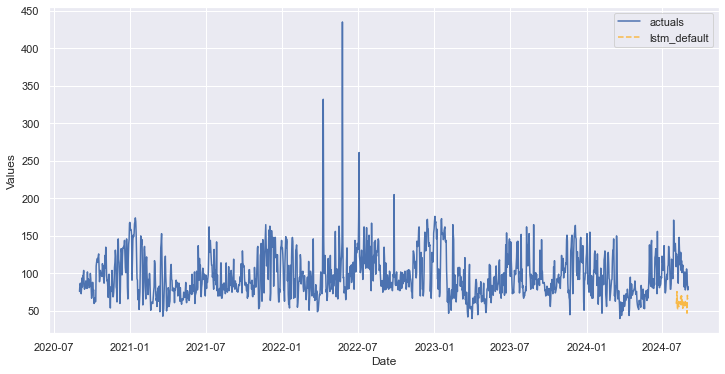

In [40]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1301
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1290
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<AxesSubplot:xlabel='Date', ylabel='Values'>

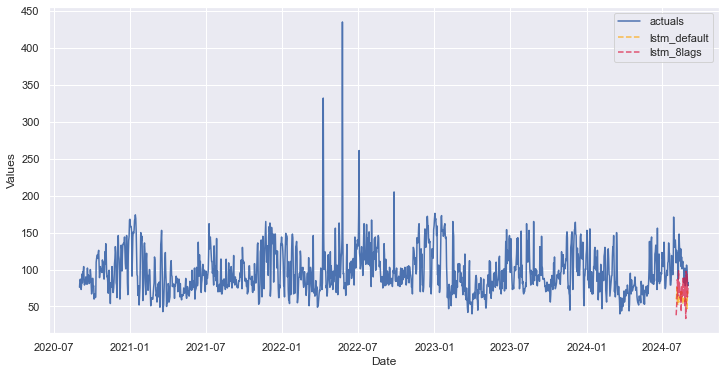

In [41]:
f.manual_forecast(call_me='lstm_8lags',lags=8)
f.plot_test_set(ci=True)


Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1386 - val_loss: 0.0833
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0841 - val_loss: 0.0611
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0629 - val_loss: 0.0553
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0588 - val_loss: 0.0538
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0565 - val_loss: 0.0534
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
Epoch 1/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1338 - val_loss: 0.0793
Epoch 2/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0782 - val_loss: 0.0585
Epoch 3/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0606 - val_loss: 0.0569
Epoch 4/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0578 - val_loss: 0.0571
Epoch 5/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0580 - val_loss: 0.0569
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

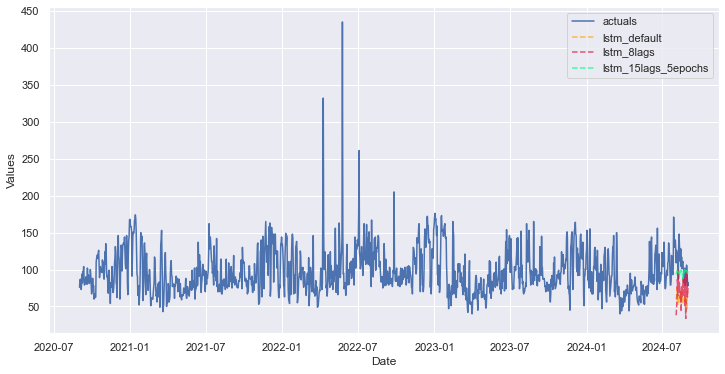

In [42]:
f.manual_forecast(call_me='lstm_15lags_5epochs',
                  lags=15,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True)
f.plot_test_set(ci=True)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 0.1227 - val_loss: 0.0617
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0628 - val_loss: 0.0547
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0587 - val_loss: 0.0542
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0584 - val_loss: 0.0539
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0581 - val_loss: 0.0538
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0580 - val_loss: 0.0536
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0578 - val_loss: 0.0535
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0576 - val_loss: 0.0533
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0575 - val_loss: 0.0532
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0574 - val_loss: 0.0531
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0573 - val_loss: 0.0530
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0

<AxesSubplot:xlabel='Date', ylabel='Values'>

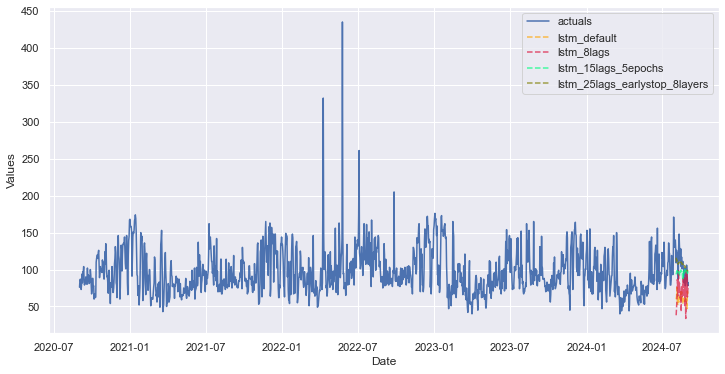

In [43]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_25lags_earlystop_8layers',
                  lags=25,
                  epochs=50,
                  validation_split=.2,
                  shuffle=False,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0)
                 )
f.plot_test_set(ci=True)

Epoch 1/6
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - loss: 0.0949 - val_loss: 0.0544
Epoch 2/6
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.0567 - val_loss: 0.0533
Epoch 3/6
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - loss: 0.0554 - val_loss: 0.0529
Epoch 4/6
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0559 - val_loss: 0.0530
Epoch 5/6
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - loss: 0.0561 - val_loss: 0.0524
Epoch 6/6
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0558 - val_loss: 0.0522
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


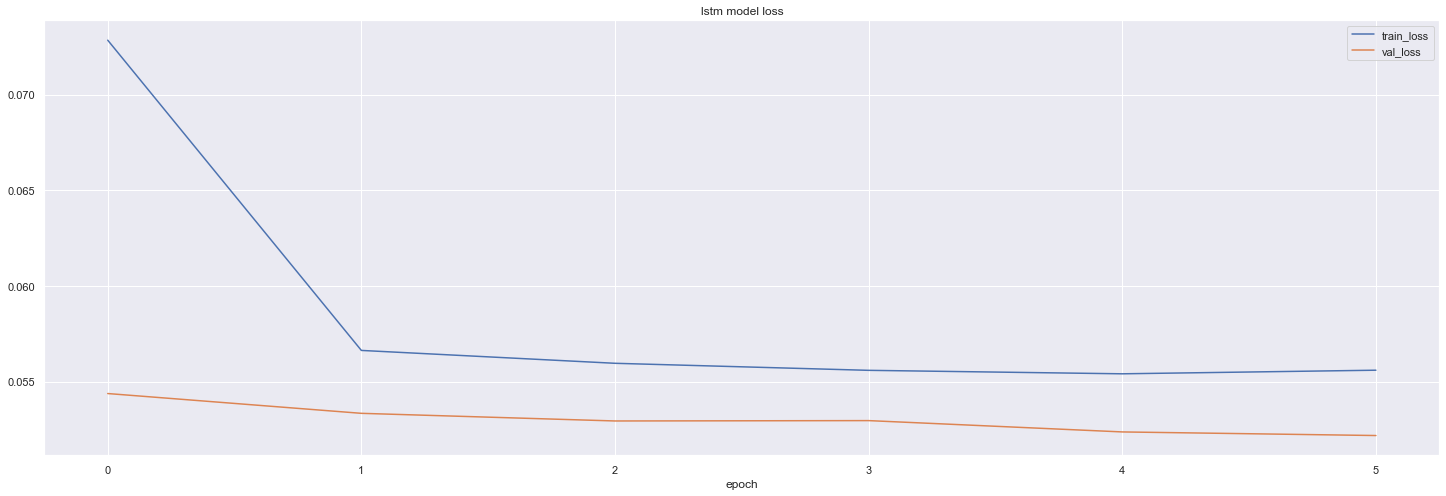

Epoch 1/6
34/34 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - loss: 0.1026 - val_loss: 0.0578
Epoch 2/6
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.0603 - val_loss: 0.0571
Epoch 3/6
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0578 - val_loss: 0.0581
Epoch 4/6
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - loss: 0.0583 - val_loss: 0.0566
Epoch 5/6
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - loss: 0.0585 - val_loss: 0.0564
Epoch 6/6
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 0.0577 - val_loss: 0.0564
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step


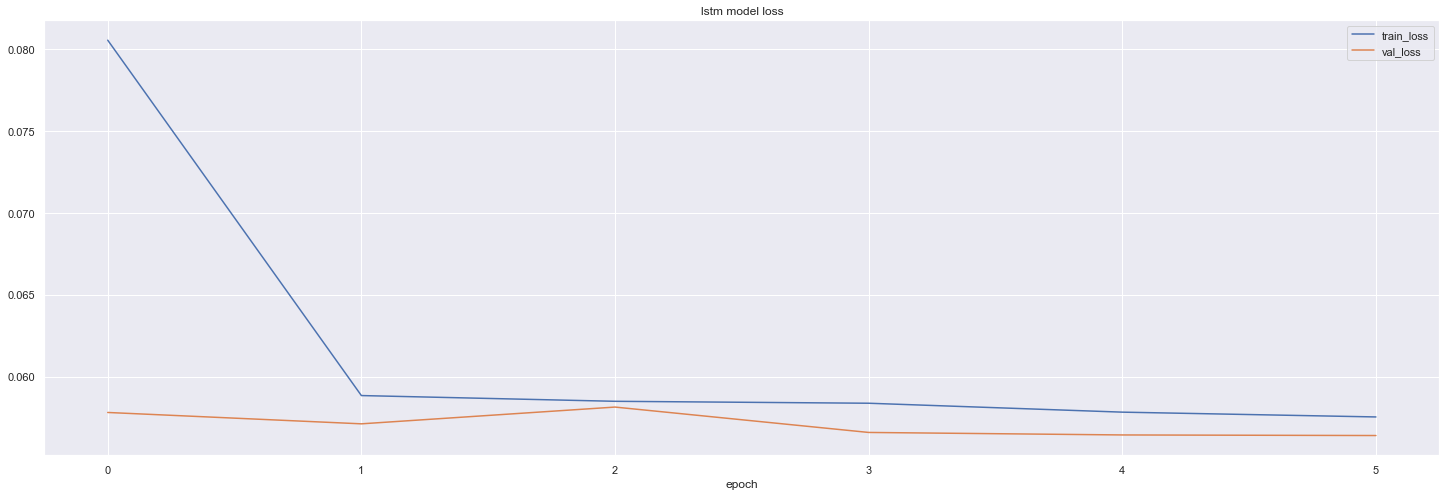

<AxesSubplot:xlabel='Date', ylabel='Values'>

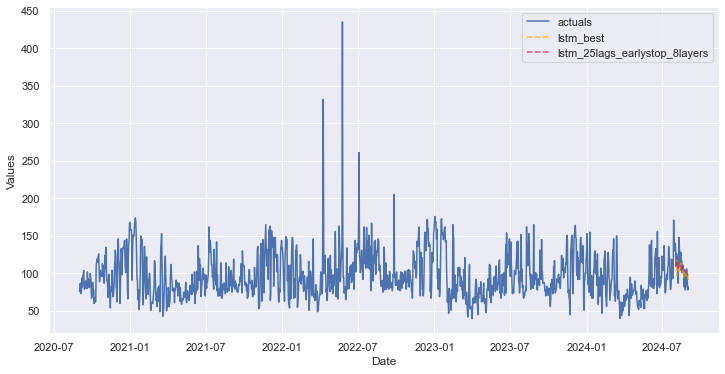

In [44]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=6,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='TestSetMAPE',models='top_2',ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

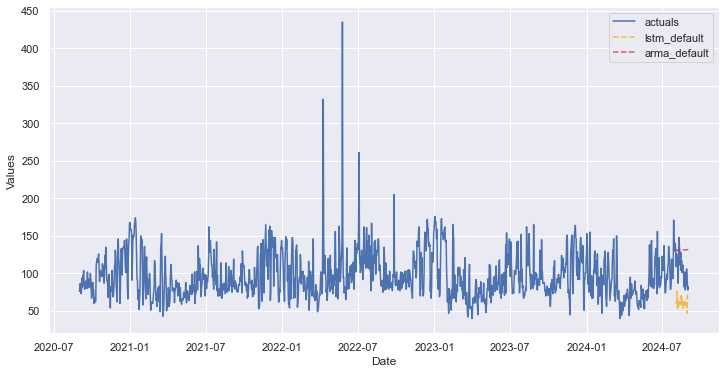

In [45]:
from statsmodels.tsa.arima.model import ARIMA
f.set_estimator('arima') 
f.manual_forecast(call_me='arma_default', order=(2, 2, 1)) 
f.plot_test_set(models=['lstm_default', 'arma_default'], ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

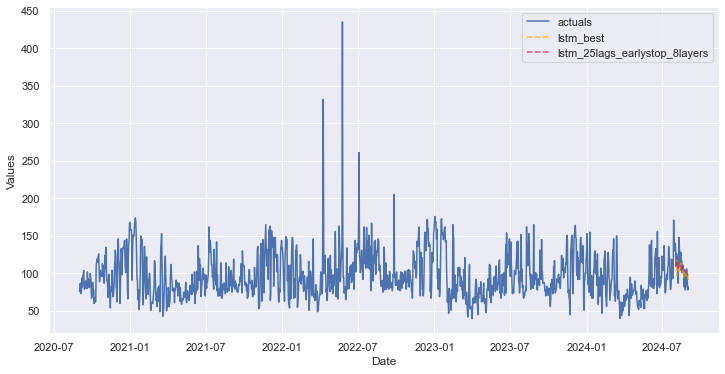

In [46]:
f.plot_test_set(order_by='TestSetMAPE', models='top_2', ci=True)

In [47]:
f.set_estimator('mlr') # 1. choose the mlr estimator
f.add_ar_terms(7) # 2. add regressors (24 lagged terms)
f.add_seasonal_regressors('month','quarter',dummy=True) # 2.
f.add_seasonal_regressors('year') # 2.
f.add_time_trend() # 2.


<AxesSubplot:xlabel='Date', ylabel='Values'>

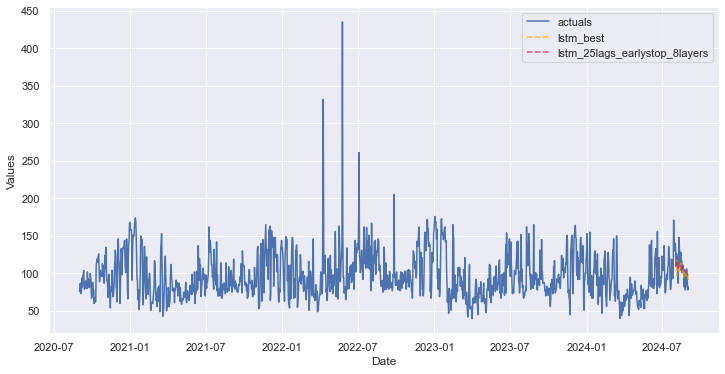

In [48]:
f.manual_forecast() 

f.plot_test_set(order_by='TestSetMAPE', models='top_2')


<AxesSubplot:xlabel='Date', ylabel='Values'>

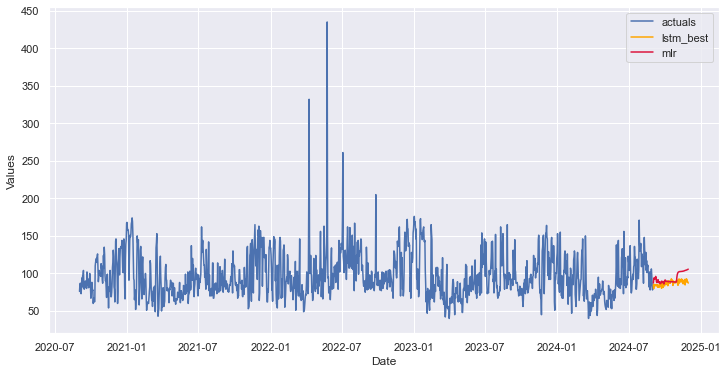

In [49]:
f.plot(models=['mlr','lstm_best'],
       order_by='TestSetMAPE')

In [50]:
df = f.export('model_summaries', determine_best_by='TestSetMAPE')
df_filtered = df[
    ['ModelNickname',  
     'TestSetMAPE',    
     'TestSetRMSE',    
     'TestSetR2',      
     'best_model']
]
df_filtered

,ModelNickname,TestSetMAPE,TestSetRMSE,TestSetR2,best_model
0,lstm_best,0.114604,14.995949,0.294314,True
1,lstm_25lags_earlystop_8layers,0.120408,15.228303,0.272277,False
2,mlr,0.141535,17.987529,-0.015328,False
3,lstm_15lags_5epochs,0.159552,20.832864,-0.361951,False
4,arma_default,0.293909,31.800737,-2.173494,False
5,lstm_8lags,0.322349,42.596779,-4.693993,False
6,lstm_default,0.399063,47.821257,-6.176378,False


In [51]:
future_predictions = f.export('lvl_fcsts')
predictions_test = f.export('lvl_test_set_predictions')
predictions_test


,DATE,actual,lstm_default,lstm_8lags,lstm_15lags_5epochs,lstm_25lags_earlystop_8layers,lstm_best,arma_default,mlr
0,2024-08-03,109.0,59.739562,38.108028,93.481162,115.962805,113.012315,129.606165,117.843750
1,2024-08-04,126.0,63.379503,48.953941,95.850084,110.929239,117.479958,131.418144,108.781250
2,2024-08-05,113.0,75.773942,58.501315,98.522651,112.835896,97.007741,130.760444,100.218750
3,2024-08-06,122.0,53.802879,86.558781,97.291673,109.627983,108.602714,130.642562,96.796875
4,2024-08-07,105.0,52.910715,64.607021,97.136019,109.170727,107.323772,130.838238,101.187500
5,2024-08-08,87.0,64.163588,87.609686,98.934597,107.154833,103.205314,130.864648,103.093750
6,2024-08-09,130.0,55.533372,98.278596,95.514385,109.116988,102.186001,130.874759,103.343750
7,2024-08-10,148.0,61.772794,68.751475,96.487192,109.775191,106.424280,130.918801,102.250000
8,2024-08-11,131.0,59.734220,81.317411,93.199372,109.795345,106.917705,130.957824,100.359375
9,2024-08-12,126.0,60.337201,66.942069,91.837091,109.189438,105.211908,130.991980,100.828125


In [52]:
future_predictions

,DATE,lstm_default,lstm_8lags,lstm_15lags_5epochs,lstm_25lags_earlystop_8layers,lstm_best,arma_default,mlr
0,2024-09-02,59.246209,60.603706,91.898734,96.649786,84.423540,82.314814,87.187500
1,2024-09-03,58.658963,64.619430,92.565325,94.659084,79.645054,81.530308,91.500000
2,2024-09-04,57.310737,71.172685,90.741125,93.789316,85.469522,81.660626,94.164062
3,2024-09-05,56.528543,65.462436,92.285701,95.309029,83.131678,81.772826,93.070312
4,2024-09-06,53.955493,78.028976,91.998537,96.904354,83.102708,81.726074,92.687500
...,...,...,...,...,...,...,...,...
85,2024-11-26,57.955963,83.360716,89.843299,94.454688,92.173950,81.885186,104.632812
86,2024-11-27,58.791445,75.340296,90.742020,94.141120,91.951390,81.887146,104.882812
87,2024-11-28,60.848233,89.874512,89.832810,94.527015,88.477279,81.889107,105.171875
88,2024-11-29,57.986479,57.439548,90.456039,92.916770,88.584454,81.891067,105.390625


In [59]:
df_diff2 = df['AQI'].diff(periods=2).dropna()

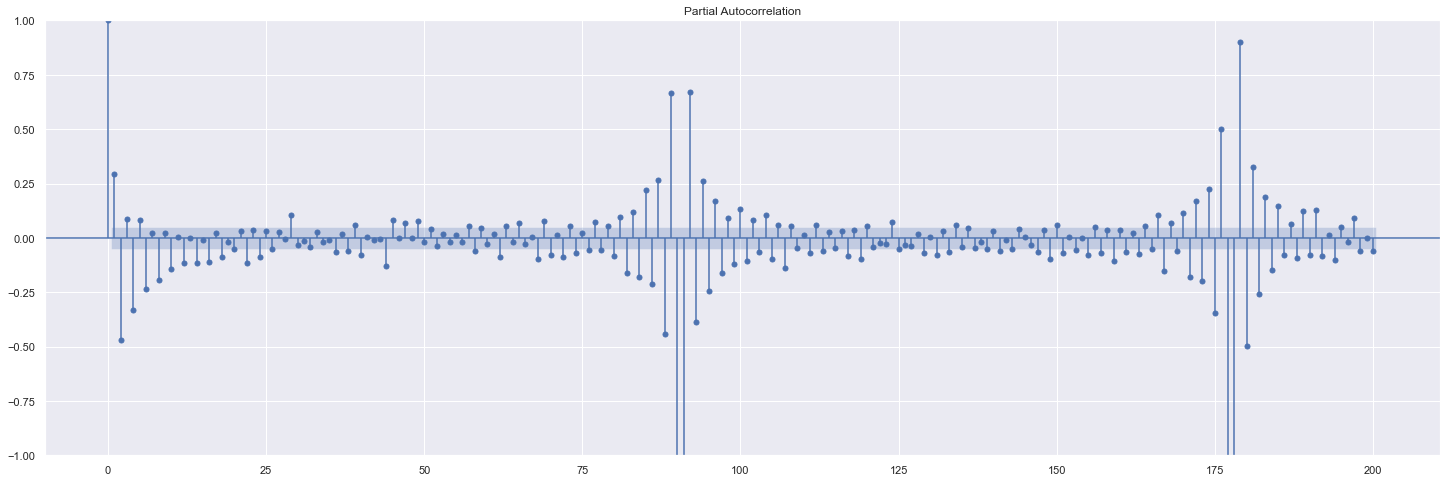

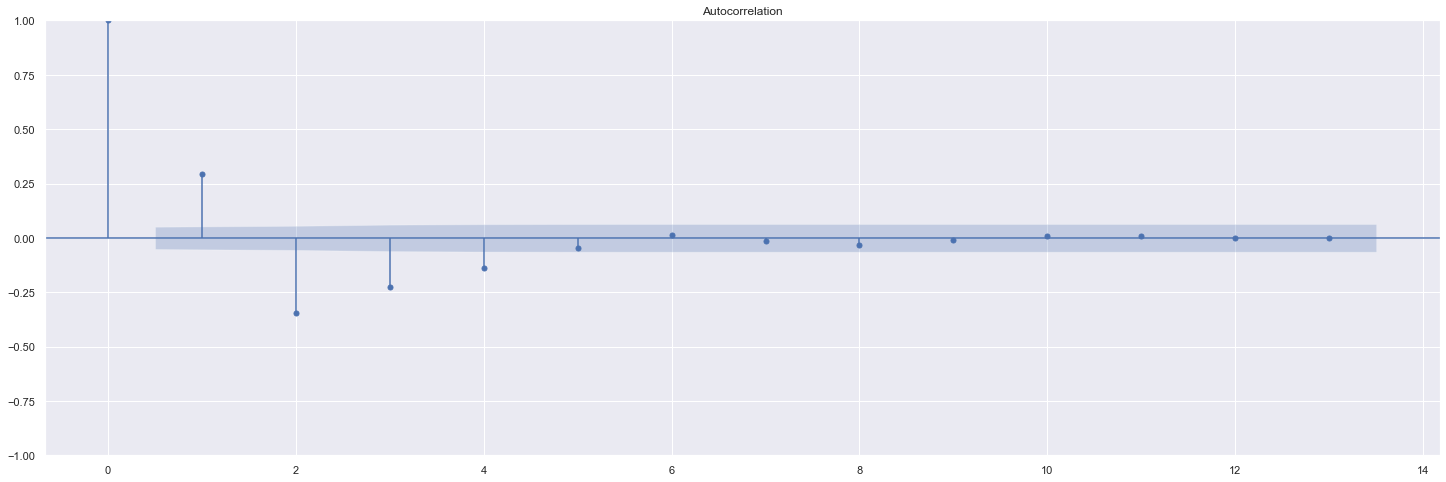

In [60]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df_diff2,lags=200)
plt.show()
plot_acf(df_diff2, lags=13)
plt.show()

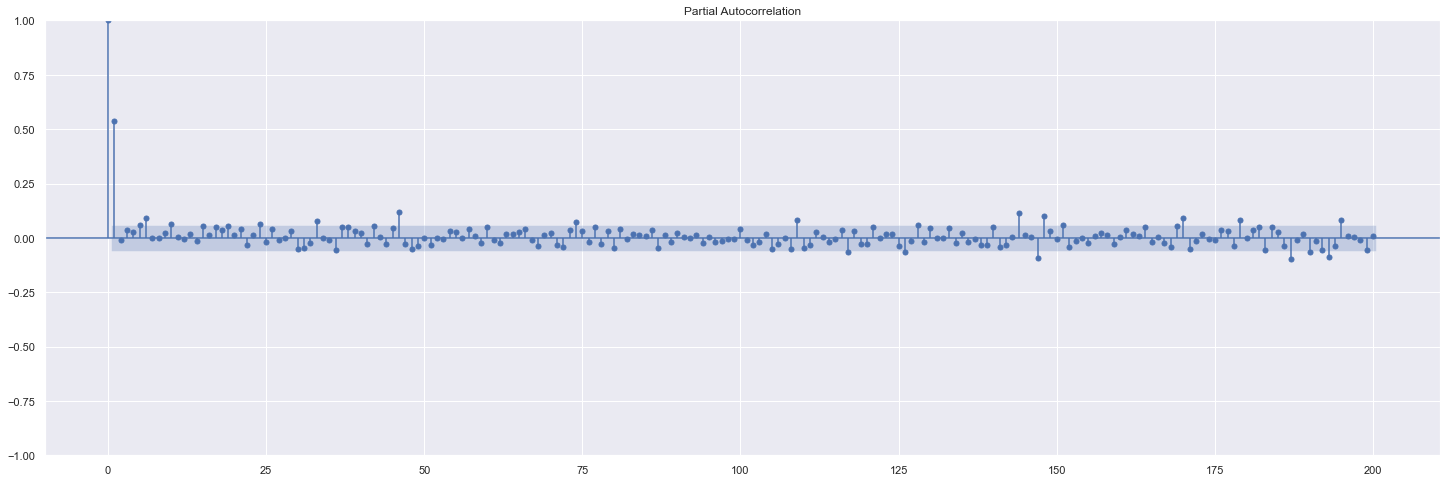

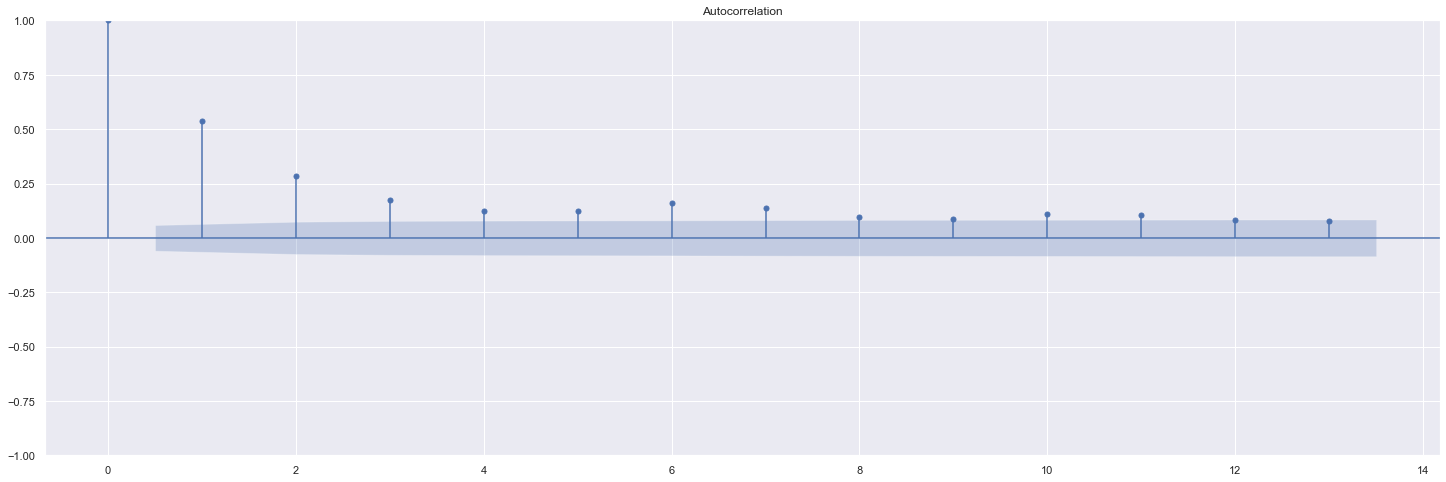

In [62]:
df_diff364 = df['AQI'].diff(periods=364).dropna()
plot_pacf(df_diff364,lags=200)
plt.show()
plot_acf(df_diff364, lags=13)
plt.show()

01:17:43 - cmdstanpy - INFO - Chain [1] start processing
01:17:44 - cmdstanpy - INFO - Chain [1] done processing


MAPE: 21.28%


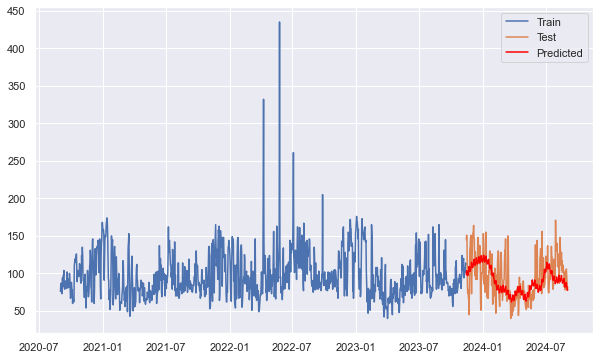

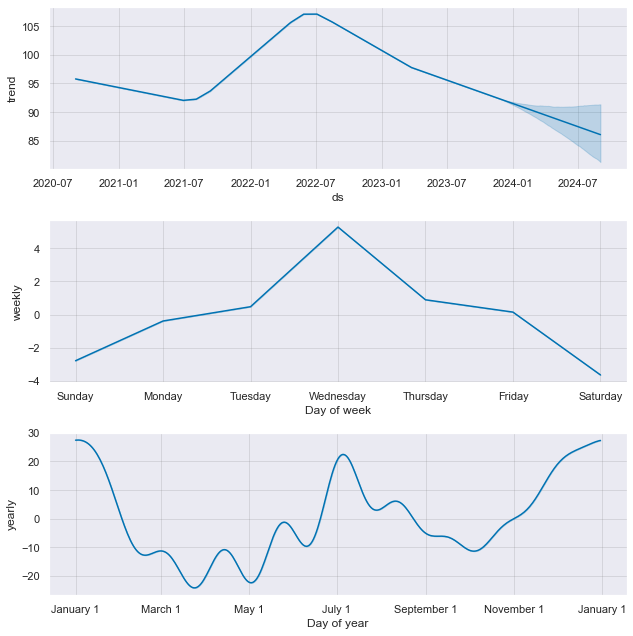

In [85]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

df['Date'] = pd.to_datetime(df['Date'])

df_prophet = df[['Date', 'AQI']].rename(columns={'Date': 'ds', 'AQI': 'y'})

train_size = int(len(df_prophet) * 0.8)
train, test = df_prophet[:train_size], df_prophet[train_size:]

model = Prophet()
model.fit(train)

future = model.make_future_dataframe(periods=len(test))

forecast = model.predict(future)

predicted = forecast['yhat'].iloc[-len(test):].values
mape = mean_absolute_percentage_error(test['y'].values, predicted)
print(f'MAPE: {mape * 100:.2f}%')

plt.figure(figsize=(10, 6))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test')
plt.plot(test['ds'], predicted, label='Predicted', color='red')
plt.legend()
plt.show()

model.plot_components(forecast)
plt.show()


In [97]:
df_filtered

,ModelNickname,TestSetMAPE,TestSetRMSE,TestSetR2,best_model
0,lstm_best,0.114604,14.995949,0.294314,True
1,lstm_25lags_earlystop_8layers,0.120408,15.228303,0.272277,False
2,mlr,0.141535,17.987529,-0.015328,False
3,lstm_15lags_5epochs,0.159552,20.832864,-0.361951,False
4,arma_default,0.293909,31.800737,-2.173494,False
5,lstm_8lags,0.322349,42.596779,-4.693993,False
6,lstm_default,0.399063,47.821257,-6.176378,False


In [104]:
import pandas as pd

new_row = {
    'ModelNickname': 'prophet_model',
    'TestSetMAPE': 0.2128,
    'TestSetRMSE': '-',  
    'TestSetR2': '-',
    'best_model': False   
}
df_filtered = df_filtered.append(new_row, ignore_index=True)
df_filtered_sorted = df_filtered.sort_values(by='TestSetMAPE', ascending=True).reset_index(drop=True)

df_filtered_sorted

,ModelNickname,TestSetMAPE,TestSetRMSE,TestSetR2,best_model
0,lstm_best,0.114604,14.995949,0.294314,True
1,lstm_25lags_earlystop_8layers,0.120408,15.228303,0.272277,False
2,mlr,0.141535,17.987529,-0.015328,False
3,lstm_15lags_5epochs,0.159552,20.832864,-0.361951,False
4,prophet_model,0.212800,-,-,False
